#Dependencies

In [122]:
!pip install tensorflow
!pip install shap

In [123]:
from google.colab import drive
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import statsmodels.api as sm
from tensorflow.keras import models, layers, utils, backend as K
import shap

# setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [ ]:
import pandas as pd

In [ ]:
DF=pd.read_csv("data.csv")

In [ ]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


In [ ]:
DF.isna().sum().sum()

0

#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

In [ ]:
d_p = {}
for col in DF.columns:
  if col.endswith('LC'):
    p = round(((DF[col][DF[col]==0].count())/len(DF))*100,2)
    d_p[col] = p


In [ ]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22,
 'URXTLC': 0.0}

In [ ]:
d_p.pop("URXTLC")

0.0

In [ ]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22}

In [ ]:
len(d_p)

25

In [ ]:
type(d_p)
import numpy as np
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [ ]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p.items() if (val <= 30 or val >= 70)}

In [ ]:
binary_variables

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMIBLC': 97.18,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTRSLC': 76.22}

In [ ]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
bin = list(binary_variables.keys())
print(bin)
for i in bin:
    binary_cols = DF[i]
    binary_dataset[i] = binary_cols
print(binary_dataset)


['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']
{'URDBP3LC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDBP3LC, Length: 2124, dtype: float64, 'URDBPHLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    1.0
2122    0.0
2123    0.0
Name: URDBPHLC, Length: 2124, dtype: float64, 'URDTRSLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    1.0
2121    1.0
2122    1.0
2123    0.0
Name: URDTRSLC, Length: 2124, dtype: float64, 'URDMPBLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDMPBLC, Length: 2124, dtype: float64, 'URDPPBLC'

In [ ]:
binary_list = []
for key in binary_dataset:
  binary_list.append(key)


In [ ]:
len(binary_list)

19

In [ ]:
print(binary_list)

['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']


In [ ]:
binary_df = DF.copy()
for i in binary_df.columns:
  if i not in binary_list:
    binary_df = binary_df.drop(columns=i)
binary_df.head()

,URDBP3LC,URDBPHLC,URDTRSLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URDCNPLC,URDCOPLC,URDECPLC,URDMBPLC,URDMC1LC,URDMEPLC,URDMHHLC,URDMCHLC,URDMIBLC,URDMOHLC,URDMZPLC,URDBPSLC
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

In [ ]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [ ]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

#which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [ ]:
intersection_set = set.intersection(set(DF.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [ ]:
print(len(intersection_list))

19


In [ ]:
intersection_list

['URDMOHLC',
 'URDTRSLC',
 'URDMBPLC',
 'URDCOPLC',
 'URDMEPLC',
 'URDMCHLC',
 'URDMPBLC',
 'URDMIBLC',
 'URDPPBLC',
 'URDCNPLC',
 'URDMZPLC',
 'URD14DLC',
 'URDBPSLC',
 'URDECPLC',
 'URDMC1LC',
 'URDDCBLC',
 'URDMHHLC',
 'URDBP3LC',
 'URDBPHLC']

In [ ]:
#percentage of what is binary in df
len(intersection_list)/len(DF)*100

0.8945386064030132

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop=[]
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

19

In [ ]:
print(cols_to_drop)

['URXMOH', 'URXTRS', 'URXMBP', 'URXCOP', 'URXMEP', 'URXMCH', 'URXMPB', 'URXMIB', 'URXPPB', 'URXCNP', 'URXMZP', 'URX14D', 'URXBPS', 'URXECP', 'URXMC1', 'URXDCB', 'URXMHH', 'URXBP3', 'URXBPH']


In [ ]:
type(cols_to_drop)

list

In [ ]:
#particular naming convention
cols_to_drop = ['URXMHNC' if item == 'URXMCH' else item for item in cols_to_drop]

In [ ]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
DF=DF.drop(columns=cols_to_drop)

In [ ]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,1.0,0.64,1.0,0.0,0.0,0.14,1.0,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.60,0.0,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,7.50,0.0,0.0,138.70,0.0,0.0,0.0,1.60,0.0,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,5.70,0.0,0.0,3.50,0.0,0.0,0.0,0.14,1.0,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,2.30,0.0,0.0,0.64,1.0,0.0,0.0,0.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.50,0.0,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.30,0.0,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.14,1.0,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,4.80,0.0,0.0,3.20,0.0,0.0,0.0,0.14,1.0,1.0


#taking log of continuous values

In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = DF.columns[DF.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in DF.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    DF[col] = np.log(DF[col])

In [ ]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.0,-1.609438,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,1.0
1,0.0,-1.203973,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
2,0.0,-2.302585,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,2.014903,0.0,0.0,4.932313,0.0,0.0,0.0,0.470004,0.0,0.0
3,0.0,-1.609438,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,0.0,...,1.740466,0.0,0.0,1.252763,0.0,0.0,0.0,-1.966113,1.0,0.0
4,0.0,-2.302585,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.916291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,-2.659260,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
2120,0.0,-1.609438,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0
2121,0.0,-0.105361,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
2122,0.0,-1.609438,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,1.568616,0.0,0.0,1.163151,0.0,0.0,0.0,-1.966113,1.0,1.0


#Splitting the data
We are trying to predict detection level of Perfluorodecanoic acid (ug/L)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(DF, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBXPFDE']
Y_test=test['LBXPFDE']

In [ ]:
include=list(X_train.columns)

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)

Lasso(alpha=1)

In [ ]:
print('R squared training set', reg.score(X_train_scaled, Y_train)*100)
print('R squared test set', reg.score(X_test_scaled, Y_test)*100)

R squared training set 0.0
R squared test set -0.020077489094516565


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.7041329477199287
MSE test set 0.6628804845616924


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.8391263002194179
RMSE test set 0.8141747260641861


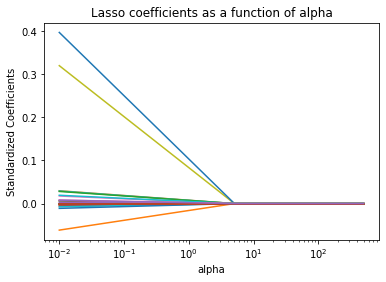

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
model.alpha_


0.010607753013496687

In [ ]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.010607753013496687)

In [ ]:
Lasso(alpha=0.008585019798920172)

Lasso(alpha=0.008585019798920172)

In [ ]:
print(list(zip(lasso_best.coef_, X_train_scaled)))

[(-0.0, array([ 0.91924477, -0.10053365, -0.68191665,  0.88793077, -0.07730882,
        0.08780978, -0.30428594,  0.38265357, -1.17474963, -0.09750299,
       -0.66206125,  0.87737772, -0.38878601,  0.4508412 , -0.20103833,
       -0.20883437,  0.02406672, -1.21518574, -0.55854195, -0.51395921,
        0.68443619, -0.72124863,  0.98307435, -0.08072538, -0.11187001,
       -0.12466332, -0.21639516, -0.10914143, -0.02426784, -0.04857862,
       -0.13407026, -0.34849985, -0.03433002, -0.08780978,  0.56216909,
       -0.35195528, -0.78815177, -0.17232809, -0.6165603 ,  0.80592466,
       -0.07297564, -0.16114026,  0.35515695, -0.73698209, -0.32132033])), (0.029359384591022778, array([ 0.72086779, -0.10053365, -0.68191665,  0.88793077, -0.07730882,
        0.08780978,  0.85930409, -2.61332988,  1.52549565, -0.09750299,
        1.54199597, -1.13975996,  3.09353892, -2.21807588, -0.20103833,
       -0.20883437,  1.07069403, -1.21518574, -0.55854195, -0.51395921,
        0.68443619, -0.5152807

In [ ]:
reg = Lasso(alpha=0.008585019798920172)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [ ]:
y_pred

array([-1.20561394,  1.35993104, -2.38027177, -0.96538697, -1.52485565,
       -2.24467249, -1.97746973, -2.42178083, -0.75269785, -2.39212155,
       -2.42081131, -1.89165224, -2.17971475, -1.99591156, -2.1866196 ,
       -1.55563704, -0.49256987, -1.76498826, -1.05723976, -1.9572615 ,
       -1.70535268, -1.33935851, -1.61083169, -1.99674017, -0.8021094 ,
       -0.44968879, -0.88228154, -2.15048054, -2.02245768, -1.87751092,
       -2.33961017, -1.93442935, -1.89226788, -2.01724756, -1.4282895 ,
       -2.35438037, -0.57429189, -2.36835046, -2.55457056, -0.71377395,
       -2.27635603, -1.14785306, -2.02394242, -0.87987377, -2.01937149,
       -2.05964877, -2.58482059, -0.70240208, -2.25787817, -2.3171427 ,
       -1.65434579, -2.02891042, -1.52597675, -2.09463658, -2.37352517,
       -1.42208192, -1.71527633, -2.14647028, -2.15375091, -2.57376512,
       -0.56403626, -1.96137845, -1.04047839, -2.3842649 , -1.0527656 ,
       -1.24800965, -2.03013076, -1.87573981, -2.06975895, -2.10

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set -1.3246232558347617
R squared test set 0.7424089231426391
MSE training set 1.6368438254692288
MSE test set 0.17071782199388233
RMSE training set 1.2793919749120004
RMSE test set 0.4131801326224221


X has feature names, but Lasso was fitted without feature names
X has feature names, but Lasso was fitted without feature names
X has feature names, but Lasso was fitted without feature names


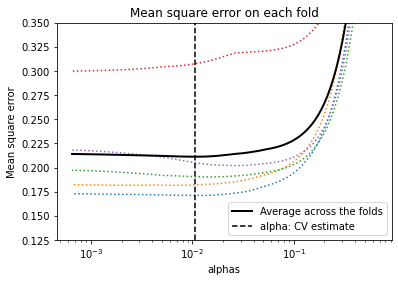

In [ ]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.125, 0.35
plt.ylim(ymin, ymax);

In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1015,-2.659260,-2.376778
699,-2.659260,-2.410599
1043,-2.659260,-2.103605
713,-2.659260,-2.244098
928,-2.659260,-2.284595
...,...,...
2004,0.788457,0.009463
1599,0.832909,0.594680
850,0.916291,-0.098311
1142,1.568616,1.359931


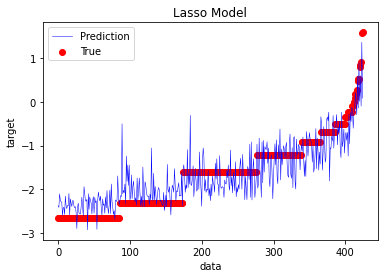

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso Model")
plt.legend()
plt.show()

#Decision Tree Regression

[Python | Decision Tree Regression using sklearn](https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

to be able to plot the results we need to make sure the results are on the same index so they match up

In [ ]:
list(X_test.index)==list(Y_test.index)

True

In [ ]:
y_pred_series=pd.Series(y_pred,index=X_test.index)
list(y_pred_series.index)==list(Y_test.index)

True

In [ ]:
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

,Actual,Prediction
1015,-2.659260,-2.659260
699,-2.659260,-2.659260
1043,-2.659260,-1.609438
713,-2.659260,-2.302585
928,-2.659260,-2.302585
...,...,...
2004,0.788457,-0.223144
1599,0.832909,1.280934
850,0.916291,0.262364
1142,1.568616,0.470004


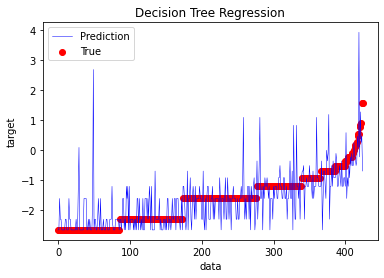

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.9999468299385164
R squared test set 0.2927532873267257
MSE training set 3.743879212292464e-05
MSE test set 0.4687259352030005
RMSE training set 0.006118724713772033
RMSE test set 0.6846356222130138


[Train a regression model using a decision tree
](https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1)

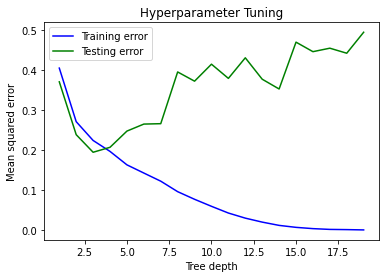

In [ ]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, Y_train)
    training_error.append(mse(Y_train, model_1.predict(X_train)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, Y_train)
    y_pred = reg.predict(X_test)
    testing_error.append(mse(Y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning')
plt.legend()

lowest for testing at around 6 and training as it goes on, but this is overfitting

In [ ]:
reg = DecisionTreeRegressor(random_state = 0,max_depth=6) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

In [ ]:
y_pred_series=pd.Series(y_pred,index=X_test.index)
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

,Actual,Prediction
1015,-2.659260,-2.517526
699,-2.659260,-2.517526
1043,-2.659260,-2.174965
713,-2.659260,-2.517526
928,-2.659260,-1.904416
...,...,...
2004,0.788457,0.375243
1599,0.832909,1.444191
850,0.916291,-0.212745
1142,1.568616,0.605970


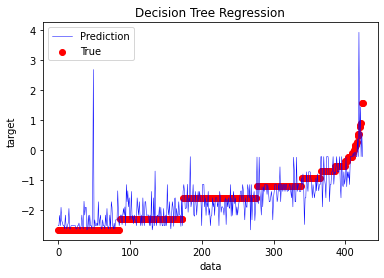

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.7975462570083436
R squared test set 0.5612435459356795
MSE training set 0.14255435082964787
MSE test set 0.2907847086065677
RMSE training set 0.37756370433298786
RMSE test set 0.5392445721623609


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
reg = RandomForestRegressor(random_state = 0)
 
#fit the regressor with x and y data
reg.fit(X_train, Y_train) 
y_pred = reg.predict(X_test)

In [ ]:
print('R squared training set', reg.score(X_train, Y_train)*100)
print('R squared test set', reg.score(X_test, Y_test)*100)

R squared training set 95.61242666401026
R squared test set 69.58119757033587


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.03089434946407821
MSE test set 0.2015998287599875


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.17576788518975306
RMSE test set 0.44899869572192247


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1015,-2.659260,-2.595463
699,-2.659260,-2.571018
1043,-2.659260,-2.020331
713,-2.659260,-2.181051
928,-2.659260,-2.123159
...,...,...
2004,0.788457,0.078446
1599,0.832909,0.969252
850,0.916291,-0.156768
1142,1.568616,1.320937


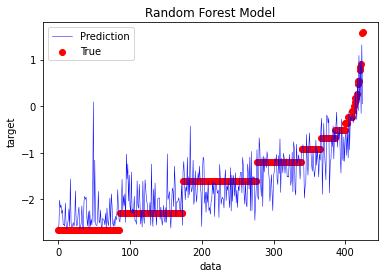

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

repeat process with most important features [Random Forest in Python
](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [ ]:
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: LBDPFUAL             Importance: 0.33
Variable: LBXPFUA              Importance: 0.28
Variable: LBXPFNA              Importance: 0.15
Variable: LBXPFHS              Importance: 0.04
Variable: URXEPB               Importance: 0.03
Variable: URXMHP               Importance: 0.02
Variable: URXMNP               Importance: 0.02
Variable: URXBPF               Importance: 0.02
Variable: LBXMPAH              Importance: 0.01
Variable: LBXPFHP              Importance: 0.01
Variable: LBXPFDO              Importance: 0.01
Variable: URXTLC               Importance: 0.01
Variable: URDTRSLC             Importance: 0.01
Variable: URXBUP               Importance: 0.01
Variable: LBDPFHSL             Importance: 0.0
Variable: LBDMPAHL             Importance: 0.0
Variable: LBXPFBS              Importance: 0.0
Variable: LBDPFBSL             Importance: 0.0
Variable: LBDPFHPL             Importance: 0.0
Variable: LBDPFNAL             Importance: 0.0
Variable: LBDPFDOL             Importance: 0.0

In [ ]:
#make a list with everying above 0 importance in order of highest to lowest
include=[]
for i,j in feature_importances:
  if j >0:
    include.append(i)
print(include)

['LBDPFUAL', 'LBXPFUA', 'LBXPFNA', 'LBXPFHS', 'URXEPB', 'URXMHP', 'URXMNP', 'URXBPF', 'LBXMPAH', 'LBXPFHP', 'LBXPFDO', 'URXTLC', 'URDTRSLC', 'URXBUP']


In [ ]:
reg_important = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg_important.fit(X_train[include], Y_train) 
y_pred = reg_important.predict(X_test[include])

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))

R squared training set 0.9561242666401025
R squared test set 0.6867210893470626


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg_important.predict(X_train[include])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg_important.predict(X_test[include])
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.03131582864187857
MSE test set 0.2076247902519579


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.17696278886217454
RMSE test set 0.4556586334658413


In [ ]:
pred_dict={}
R_train_dict={}
R_test_dict={}
mse_train_dict={}
mse_test_dict={}
rmse_train_dict={}
rmse_test_dict={}
#making a loop to go through adding one at a time and evaulating
for i in range(1,len(include)+1):
  #used is a list of what will be included
  used=include[:i]
  #fit the regression
  rf = RandomForestRegressor(random_state = 0)
  rf.fit(X_train[used], Y_train)
  y_pred = rf.predict(X_test[used])
  pred_dict[i]=y_pred
  pred_train = rf.predict(X_train[used])
  #R squared test
  R_train=metrics.r2_score(Y_train,pred_train)
  R_train_dict[i]=R_train
  R_test=metrics.r2_score(Y_test,y_pred)
  R_test_dict[i]=R_test
  #MSE
  mse_train = mean_squared_error(Y_train, pred_train)
  mse_train_dict[i]=mse_train
  mse_test = mean_squared_error(Y_test, y_pred)
  mse_test_dict[i]=mse_test
  #RMSE
  rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
  rmse_train_dict[i]=rmse_train
  rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
  rmse_test_dict[i]=rmse_test

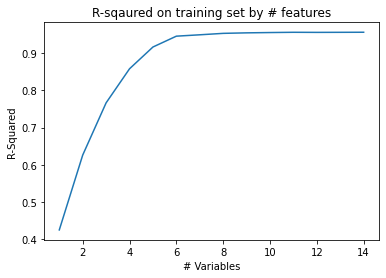

In [ ]:
# Make a graph by #vars
plt.plot([int(key) for key in R_train_dict.keys()], 
         [float(value) for value in R_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on training set by # features');

levels off around 4-6 features

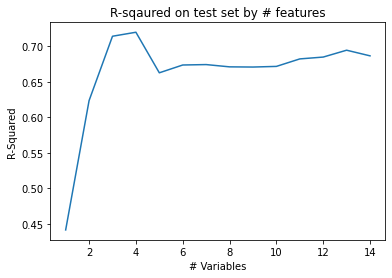

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in R_test_dict.keys()], 
         [float(value) for value in R_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on test set by # features');

highest at 3-4 features

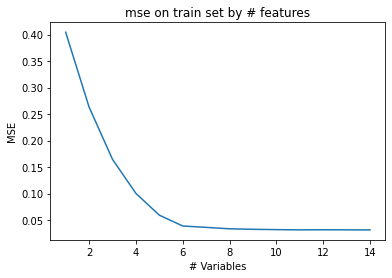

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_train_dict.keys()], 
         [float(value) for value in mse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on train set by # features');

levels off around 4-6 features

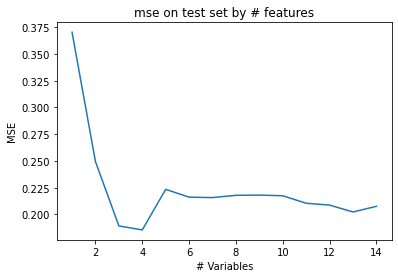

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_test_dict.keys()], 
         [float(value) for value in mse_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on test set by # features');

lowest around 3 features

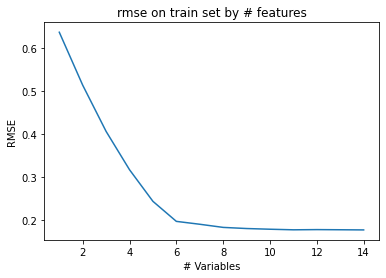

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_train_dict.keys()], 
         [float(value) for value in rmse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on train set by # features');

levels off around 4-6 features

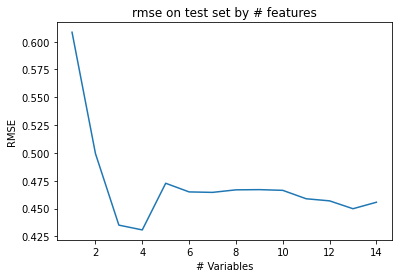

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_test_dict.keys()], 
         [float(value) for value in rmse_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on test set by # features');

lowest around 3 features

**verdict: use 3 features**

In [ ]:
include[0:3]

['LBDPFUAL', 'LBXPFUA', 'LBXPFNA']

In [ ]:
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred = reg2.predict(X_test[include[0:3]])

In [ ]:
#for later use
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred_forest = reg2.predict(X_test[include[0:3]])
y_pred_series_forest=pd.Series(y_pred_forest,index=X_test.index)

In [ ]:
pred_train = reg2.predict(X_train[include[0:3]])
#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg2.predict(X_test[include[0:3]])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.7662762154483098
R squared test set 0.714367757687253
MSE training set 0.16457261736863918
MSE test set 0.1893020320958667
RMSE training set 0.4056755074793636
RMSE test set 0.4350885336294979


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1015,-2.659260,-2.511527
699,-2.659260,-2.511527
1043,-2.659260,-2.063136
713,-2.659260,-2.511527
928,-2.659260,-2.346238
...,...,...
2004,0.788457,0.017303
1599,0.832909,0.763363
850,0.916291,-0.014765
1142,1.568616,2.590825


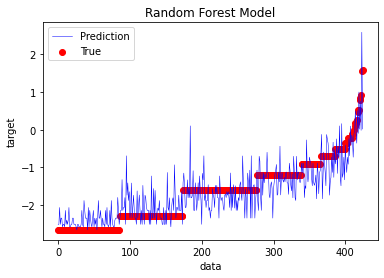

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

# Ordinary Least Squares Regression

In [ ]:
X=DF.drop(columns=['LBDPFDEL','LBXPFDE'])
Y=DF['LBXPFDE']

In [ ]:
#X = sm.add_constant(X)
reg = sm.OLS(Y, sm.add_constant(X)).fit()
print(reg.summary())

In [ ]:
#X = sm.add_constant(X)
reg = sm.OLS(Y, sm.add_constant(X)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                LBXPFDE   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     118.4
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:17:50   Log-Likelihood:                -1279.2
No. Observations:                2124   AIC:                             2650.
Df Residuals:                    2078   BIC:                             2911.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0560      0.560     -0.100      0.9

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
print("Parameters: ", reg.params)
print("R2: ", reg.rsquared)

Parameters:  const      -0.056002
LBXPFHS    -0.017912
LBDPFHSL    0.287087
LBXMPAH     0.020065
LBDMPAHL   -0.020470
LBXPFBS    -0.211175
LBDPFBSL   -0.323307
LBXPFHP     0.093408
LBDPFHPL    0.029074
LBXPFNA     0.495974
LBDPFNAL    0.408695
LBXPFUA     0.486339
LBDPFUAL   -0.137899
LBXPFDO     0.163800
LBDPFDOL    0.111399
URDBP3LC    0.034694
URDBPHLC   -0.051383
URXTLC     -0.007287
URDTLCLC   -0.021488
URDTRSLC    0.020746
URXBUP      0.023087
URDBUPLC    0.017946
URXEPB      0.004258
URDEPBLC    0.048914
URDMPBLC   -0.171894
URDPPBLC    0.112133
URD14DLC    0.101456
URDDCBLC   -0.000493
URDCNPLC   -0.027989
URDCOPLC   -0.125530
URDECPLC   -0.399789
URDMBPLC   -0.210406
URDMC1LC    0.023266
URDMEPLC   -0.375349
URDMHHLC   -0.098397
URDMCHLC    0.013757
URXMHP      0.007898
URDMHPLC    0.029275
URDMIBLC    0.040481
URXMNP     -0.002468
URDMNPLC    0.004931
URDMOHLC    0.180563
URDMZPLC    0.051153
URXBPF      0.012745
URDBPFLC    0.038737
URDBPSLC    0.042019
dtype: float64
R2:  0

In [ ]:
print("Standard errors: ", reg.bse)

Standard errors:  const       0.560468
LBXPFHS     0.013075
LBDPFHSL    0.146674
LBXMPAH     0.019500
LBDMPAHL    0.030465
LBXPFBS     0.276111
LBDPFBSL    0.234823
LBXPFHP     0.054823
LBDPFHPL    0.049955
LBXPFNA     0.021429
LBDPFNAL    0.150951
LBXPFUA     0.021103
LBDPFUAL    0.031033
LBXPFDO     0.046779
LBDPFDOL    0.051959
URDBP3LC    0.053679
URDBPHLC    0.052049
URXTLC      0.007625
URDTLCLC    0.027873
URDTRSLC    0.023827
URXBUP      0.010156
URDBUPLC    0.032092
URXEPB      0.008908
URDEPBLC    0.029497
URDMPBLC    0.132164
URDPPBLC    0.096906
URD14DLC    0.081524
URDDCBLC    0.049591
URDCNPLC    0.092293
URDCOPLC    0.269624
URDECPLC    0.203332
URDMBPLC    0.092515
URDMC1LC    0.035223
URDMEPLC    0.234771
URDMHHLC    0.140460
URDMCHLC    0.024479
URXMHP      0.018078
URDMHPLC    0.032012
URDMIBLC    0.070161
URXMNP      0.015353
URDMNPLC    0.031951
URDMOHLC    0.161964
URDMZPLC    0.071025
URXBPF      0.009054
URDBPFLC    0.027506
URDBPSLC    0.035496
dtype: float64


In [ ]:
y_pred=reg.fittedvalues

In [ ]:

print(list(X.index)==list(Y.index))
y_pred_series=pd.Series(y_pred,index=X.index)
print(list(y_pred_series.index)==list(Y.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1061,-2.659260,-2.257749
877,-2.659260,-2.163219
881,-2.659260,-2.532625
886,-2.659260,-2.431287
887,-2.659260,-2.281391
...,...,...
1142,1.568616,1.521764
721,1.589235,0.201108
2082,1.987874,0.369174
1509,2.694627,-2.146794


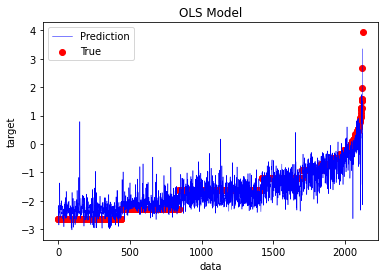

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

[First Steps to Understand and Improve Your OLS Regression — Part 1](https://georgepaskalev.medium.com/first-steps-to-understand-and-improve-your-ols-regression-part-1-dc7a8e911684)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of

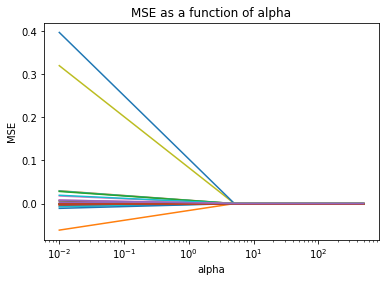

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
error = []

for a in alphas:
    model=sm.OLS(Y, sm.add_constant(X),alpha=a).fit()
    error.append(mse(Y, model.fittedvalues))

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE as a function of alpha');

In [ ]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  A simple ordinary least squares model.
 |  
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The dependent variable.
 |  exog : array-like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none.'
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and a

#Neural Network

[sklearn.neural_network.MLPRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install shap

In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import shap

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from collections import defaultdict

In [ ]:
labels=Y_train
data=X_train_scaled
dev_labels=Y_train
dev_data=X_test_scaled

<BarContainer object of 35 artists>

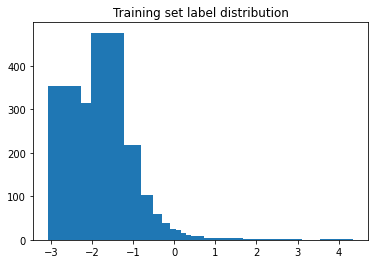

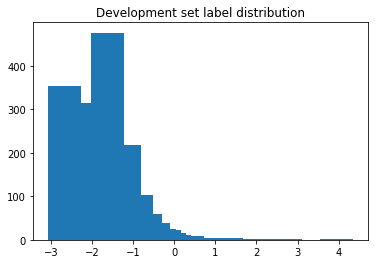

In [ ]:
counts = defaultdict(int)
for label in labels:
 counts[label] += 1

plt.figure()
plt.title("Training set label distribution")
k = counts.keys()
v = counts.values()
plt.bar(list(k), height=list(v))
dev_counts = defaultdict(int)
for label in dev_labels:
 dev_counts[label] += 1
plt.figure()
plt.title("Development set label distribution")
dk = dev_counts.keys()
dv = dev_counts.values()
plt.bar(list(dk), height=list(dv))

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = MLPRegressor(random_state=0, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.9204468317652427
R squared test set 0.5151349430469172
MSE training set 2.985929161861903
MSE test set 0.3213430662810035
RMSE training set 1.7279841324103364
RMSE test set 0.5668712960461162


X has feature names, but MLPRegressor was fitted without feature names
X has feature names, but MLPRegressor was fitted without feature names


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1015,-2.659260,-2.682955
699,-2.659260,-2.602722
1043,-2.659260,-2.466476
713,-2.659260,-0.713889
928,-2.659260,-2.427066
...,...,...
2004,0.788457,0.432800
1599,0.832909,-0.560009
850,0.916291,-0.495445
1142,1.568616,1.454165


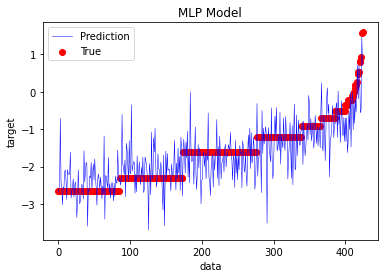

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

In [125]:
test_Df['Actual'].value_counts()

-1.609438    103
-2.302585     88
-2.659260     86
-1.203973     62
-0.916291     27
-0.693147     20
-0.510826     14
-0.223144      6
-0.356675      4
-0.105361      2
 0.182322      2
 0.530628      2
 0.788457      1
 1.568616      1
 0.916291      1
 0.832909      1
 0.000000      1
 0.470004      1
 0.262364      1
 0.095310      1
 1.589235      1
Name: Actual, dtype: int64

# **make a table or plot: take the 103 that are -1.6 take the means and stdvs for those predictions. for each one of the numbers. summarize in table: if this is the actual value... here is my prediction mean and std (if plot could do an error bar, but table preferred)**

# All plots

In [120]:
test_DF= pd.DataFrame(columns = ['Actual', 'Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
test_DF['Actual']=Y_test
#lasso
reg = Lasso(alpha=0.008585019798920172)
reg.fit(X_train_scaled, Y_train)
y_pred_lasso=reg.predict(X_test_scaled)
y_pred_series_lasso=pd.Series(y_pred_lasso,index=X_test.index)
test_DF['Lasso']=y_pred_series_lasso

#Decision Tree
reg = DecisionTreeRegressor(random_state = 0,max_depth=6) 
reg.fit(X_train, Y_train)
y_pred_tree = reg.predict(X_test)
y_pred_series_tree=pd.Series(y_pred_tree,index=X_test.index)
test_DF['Decision Tree']=y_pred_series_tree

#Random Forest 
#y_pred_forest
#y_pred_series_forest
test_DF['Random Forest']=y_pred_series_forest

#OLS i'm not including in this DF because using different data

#Neural Newtwork
reg = MLPRegressor(random_state=0, max_iter=500).fit(X_train_scaled, Y_train)
y_pred_NN=reg.predict(X_test_scaled)
y_pred_series_NN=pd.Series(y_pred_NN,index=X_test.index)
test_DF['Neural Network']=y_pred_NN

In [121]:
test_DF

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
1981,-1.203973,-1.205614,-1.374135,-1.329748,NaN,-1.711229
1142,1.568616,1.359931,0.605970,2.590825,NaN,1.454165
720,-2.302585,-2.380272,-2.517526,-2.511527,NaN,-2.787656
1718,-1.203973,-0.965387,-0.227081,-1.071344,NaN,-0.312479
1065,-0.916291,-1.524856,-1.353897,-1.833782,NaN,-1.377750
...,...,...,...,...,...,...
1010,-1.203973,-0.828354,-0.232119,-0.702982,NaN,-1.722024
1581,-1.609438,-1.958128,-1.889906,-1.878326,NaN,-1.686861
1131,-2.302585,-2.083784,-2.163291,-2.141155,NaN,-2.287428
966,-1.609438,-1.678320,-1.353897,-1.416894,NaN,-1.472036
